In [1]:
import numpy as np
import qiskit
from qiskit import Aer

In [2]:
%matplotlib inline

In [3]:
# 3 qubits
circ = qiskit.QuantumCircuit(3)

In [4]:
# prepare initial state
# input qubit |psi> = Ry(pi/3) |0>
circ.ry(np.pi/3, 0)
# entangle the second and third qubit
circ.h(1)
circ.cx(1, 2)
# barrier to prevent gate reordering for optimization
circ.barrier(range(3))

In [5]:
# actual teleportation circuit
circ.cx(0, 1)
circ.h(0)
circ.barrier(range(3))
circ.cx(1, 2)
circ.cz(0, 2)

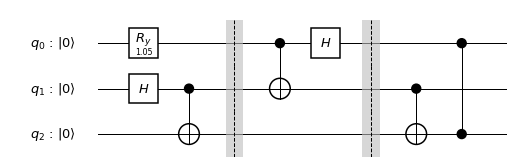

In [6]:
circ.draw()

In [7]:
# use Aer's statevector simulator
backend = Aer.get_backend('statevector_simulator')

# execute the circuit on the simulator
job = qiskit.execute(circ, backend)

result = job.result()
statevector = result.get_statevector(circ)
# entries are (\sqrt(3)/2, 1/2), multiplied by 1/2 due to the computational basis superposition of the first two qubits
print(statevector)

[0.4330127+0.j 0.4330127+0.j 0.4330127+0.j 0.4330127+0.j 0.25     +0.j
 0.25     +0.j 0.25     +0.j 0.25     +0.j]
